Loading the packages:

In [1]:
import numpy as np
import scipy.linalg as lina
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

# System Model

Initially, only the equation for one state (temperature or concentration) will be considered. For simplicity, the domain will be $[0,1]$, with Danckwerts boundary conditions:

$$\left\{\begin{array}{l} \dot{x} = D\partial_{\zeta\zeta} x -v\partial_{\zeta} x +kx\\
D\partial_\zeta x(0,t)-vx(0,t)=-Rv[x(1,t-\tau)+u(t-\tau_I)] \\
\partial_\zeta x(1,t)=0 \\
y(t)=x(1,t-\tau_O)
  \end{array}\right. $$

This model considers that the input is applied in the reactor's entrance, which is mixed with the recycle from the outlet. Input, output, and state delays are considered and represented by $\tau_I,\tau_O$, and $\tau$, respectively. 

Initializing system parameters:

In [2]:
k = -1
D = 0.1
v = 0.5
tau = 1
R = 0.9

## Eigenvalue Analysis

The eigenvalue problem, defined as $A\Phi(\zeta,\lambda)=\lambda\Phi(\zeta,\lambda)$, will result in the following system of equation for this system:

$$\left\{\begin{array}{l} \lambda\phi = D\partial_{\zeta\zeta} \phi -v\partial_{\zeta} \phi +k\phi\\
\lambda\phi_D=\dfrac{1}{\tau}\partial_{\zeta}\phi_D\\
D\partial_\zeta \phi(0)-v\phi(0)=-v\phi_D(0) \\
\partial_\zeta \phi(1)=0 \\
\phi_D(1)=\phi(1)\\
  \end{array}\right. $$

where $\Phi=[\phi,\,\phi_D]^T$, with $\phi$ as the state eigenfunction and $\phi_D$ as the eigenfunction related to the delay. By defining $X=[\phi,\, \partial_{\zeta}\phi,\,\phi_D]^T$, the following system of ODEs is obtained:
$$\left\{\begin{array}{l}\partial_{\zeta}X=\begin{bmatrix} 0 & 1 & 0\\ \dfrac{\lambda-k}{D} & \dfrac{v}{D} & 0\\0 & 0 & \tau\lambda\end{bmatrix}X=ΛX \\
DX_2(0)-vX_1(0)=-RvX_3(0) \\
X_2(1)=0 \\
X_3(1)=X_1(1)\\ \end{array}\right.$$

## Characteristic Equation

This is a system of first order ODE's, and the solution to such systems is given by:

$$ X(\zeta, \lambda) = e^{\Lambda \zeta} X (\zeta=0, \lambda) \\ \overset{\zeta = 1}{\Rightarrow} X(1, \lambda) = e^{\Lambda} X (\zeta=0) $$

Now, let's assume:

$$ e^{\Lambda} = Q(\lambda) = \begin{bmatrix} 
        q_{1} & q_{2} & q_{3} \\ q_{4} & q_{5} & q_{6} \\ q_{7} & q_{8} & q_{9}
    \end{bmatrix} $$


Thus, we may write:

$$\left\{\begin{array}{l}
X_1(1) = q_1 X_1(0) + q_2 X_2(0) + q_3 X_3(0) \\
X_2(1) = q_4 X_1(0) + q_5 X_2(0) + q_6 X_3(0) \\
X_3(1) = q_7 X_1(0) + q_8 X_2(0) + q_9 X_3(0)
\end{array}\right.$$

Now, we may go ahead and put the above expressions into boundary conditions to get the following:

$$\left\{\begin{array}{l}
Dx_2-vx_1=-Rvx_3 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
q_7 x_1 + q_8 x_2 + q_9 x_3 = q_1 x_1 + q_2 x_2 + q_3 x_3
\end{array}\right. \Rightarrow \left\{\begin{array}{l}
-vx_1 + Dx_2 - Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
(q_1 - q_7) x_1 + (q_2 - q_8) x_2 + (q_3 - q_9) x_3 = 0
\end{array}\right.$$


where $x_i$ is the same as $X_i(0)$.

For this particular case, we know that:

$$ q_{3} = q_{6} = q_{7} = q_{8} = 0 $$

This will further simplify the above system of equions into the following system:

$$\left\{\begin{array}{l}
-vx_1 + Dx_2 - Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 = 0 \\
q_1 x_1 + q_2 x_2 - q_9 x_3 = 0
\end{array}\right.$$

This is a $3 \times 3$ system of algebraic equations in the form of $\bar{A} \bar{x} = 0 $, with:

$$ \bar{A} = \begin{bmatrix}
-v & D & -Rv \\
q_4 & q_5 & 0 \\
q_1 & q_2 & -q_9
\end{bmatrix}; \quad \bar{x} = \begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix} $$

 For such a system to have non-trivial solution (i.e. $\bar{x} \neq 0$), the dimension of the nullspace of the coefficients matrix $\bar{A}$ needs to be non-zero. This will happen if and only if the coefficients matrix $\bar{A}$ is rank-deficient. One way to make sure matrix $ \bar{A} $ is not full-rank, is to set a linear combination of its rows to be zero, with non-zero coefficients. Multiplying the second row of the matrix by $\alpha$ and the third row by $\beta$, we can write:

$$
\left\{\begin{array}{l}
-v + \alpha q_4 + \beta q_1 = 0 \\
D + \alpha q_5 + \beta q_2 = 0 \\
-Rv - \beta q_9 = 0 
\end{array}\right.
\Rightarrow
\left\{\begin{array}{l}
\alpha q_4 + \beta q_1 = v \\
\alpha q_5 + \beta q_2 = -D \\
\beta q_9 = -Rv 
\end{array}\right.
$$

The above system is a system of 3 equations and 3 unknowns (i.e. $\alpha$, $\beta$, and $\lambda$, with $\lambda$ being hidden in $q_i$ terms). By writing $\alpha$ and $\beta$ variables based on $q_i$ terms, we can get the characteristic equation.

Using the third equation, we can get:

$$ \beta = \frac{-Rv}{q_9} $$

Using the above equation to replace $\beta$ into the second equation will result in:

$$ \alpha = \frac{v}{q_4} \left(1 + \frac{R q_1}{q_9} \right) $$

Therefore, we can put the above expressions for $\alpha$ and $\beta$ into the first equation to get the characteristic equation, which is a non-linear function of the eigenvalue of the system, $\lambda$:

$$ f(\lambda) = D + v \frac{q_5}{q_4} \left( 1 + \frac{R q_1}{q_9} \right) - Rv \frac{q_2}{q_9} = 0 $$

We may now multiply both sides of the charactersitic equation by $q_4 q_9$ to avoid numerical errors while solfing for $f(\lambda)$. This will give:

$$ g(\lambda) = D q_4 q_9 + v [ q_5 q_9 + R (q_1 q_5 - q_2 q_4)] = 0 $$

## Numerical Solution

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


,Sol_r,Sol_i,Guess_r,Guess_i,g(x)
25937,-143.730377,3.088207e+00,-91.191191,0.183673,1.117013e-09
23044,-143.730377,-3.088207e+00,-91.191191,-0.183673,1.096132e-09
24965,-123.817006,1.034082e-10,-92.692693,0.061224,1.145275e-09
24008,-123.817006,-9.601916e-11,-92.692693,-0.061224,1.068633e-09
24020,-123.817006,3.677531e-10,-91.491491,-0.061224,3.114660e-09
...,...,...,...,...,...
25841,-0.975941,1.328781e-11,-1.001001,0.061224,6.189388e-08
27805,-0.975941,-6.402152e-12,-1.001001,0.306122,6.219421e-08
22947,-0.975941,6.402160e-12,-1.001001,-0.306122,6.219423e-08
22950,-0.975941,1.268738e-10,-0.700701,-0.306122,9.624619e-07


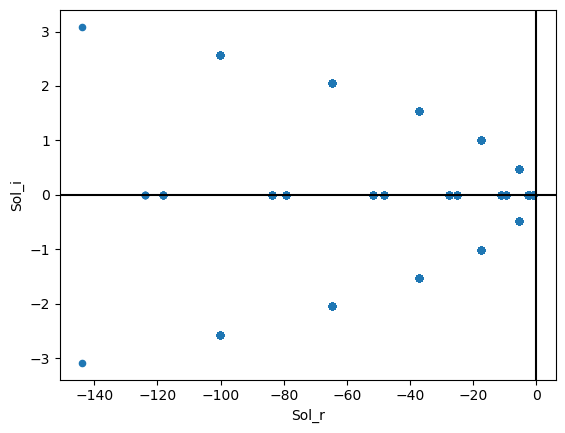

In [3]:
def g(x):
    l = complex(x[0], x[1])
    A = np.array([
        [0, 1, 0],
        [(l-k)/D, v/D, 0],
        [0, 0, tau * l]
    ])
    Q = lina.expm(A)
    q = np.insert(Q,0,0)
    y = D * q[4] * q[9] + v * (q[5] * q[9] + R * (q[1] + q[5] - q[2] * q[4]))
    return np.array([y.real, y.imag])

mesh = np.meshgrid(np.linspace(-100,0,1000),np.linspace(-3,3,50))
init_guess_complex = mesh[0] + mesh[1] * 1j

solution_lambda_dict = {'Sol_r':[],'Sol_i':[],'Guess_r':[],'Guess_i':[],'g(x)':[]}

for i in init_guess_complex:
    for m in i:
        m = np.array([m.real, m.imag])
        # result = opt.minimize(lambda x: np.sum(g(x)**2), m, method='BFGS')
        # solution_array = result.x
        solution_array = opt.fsolve(g,m)
        is_near = g(solution_array)
        is_near = (abs(complex(is_near[0],is_near[1])))
        if np.isclose(is_near,0,atol=0.0001):
            solution_lambda_dict['Guess_r'].append(m[0])
            solution_lambda_dict['Guess_i'].append(m[1])
            solution_lambda_dict['g(x)'].append(is_near)
            solution_lambda_dict['Sol_r'].append(solution_array[0])
            solution_lambda_dict['Sol_i'].append(solution_array[1])


solution_lambda_df = pd.DataFrame(solution_lambda_dict)
solution_lambda_df = solution_lambda_df.sort_values(by=['Sol_r'])
display(solution_lambda_df)

# solution_lambda_df.to_csv('file_name.csv')
ax = solution_lambda_df.plot.scatter(x='Sol_r',y='Sol_i')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()